<a href="https://colab.research.google.com/github/mohsingul/BankMarketing/blob/main/NCIndividualCourseWork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [2]:
import os

# TODO: Fill in the Google Drive path where you uploaded the lab materials
# Example: GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'Colab Notebooks/Lab materials 01-20210104'
directoryNCIndCourWork = '/content/drive/MyDrive/NeuralComputing/NCIndividualCourseWork/'



GOOGLE_DRIVE_PATH = os.path.join(directoryNCIndCourWork)
print(os.listdir(GOOGLE_DRIVE_PATH))

['NCGroupCourseWorkSalaryPrediction.ipynb', 'online_shoppers_intention.csv', 'NCIndividualCourseWork.ipynb']


In [258]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder    
from imblearn.over_sampling import SMOTE 
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
import torch
from torch.autograd import Variable
import torch.nn as nn
from torch.autograd import Variable
from torch.cuda.amp import autocast
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import chi2
from scipy.stats import pearsonr

In [190]:
onlineShopperIntenData = pd.read_csv(os.path.join(GOOGLE_DRIVE_PATH, 'online_shoppers_intention.csv'))





In [191]:
onlineShopperIntenData.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [192]:
for column_name in onlineShopperIntenData.columns:
    unique_counts = onlineShopperIntenData[column_name].value_counts()
    print(f"Column '{column_name}' has {len(unique_counts)} unique values:\n{unique_counts}\n")

Column 'Administrative' has 27 unique values:
0     5768
1     1354
2     1114
3      915
4      765
5      575
6      432
7      338
8      287
9      225
10     153
11     105
12      86
13      56
14      44
15      38
16      24
17      16
18      12
19       6
24       4
22       4
23       3
21       2
20       2
27       1
26       1
Name: Administrative, dtype: int64

Column 'Administrative_Duration' has 3335 unique values:
0.000000      5903
4.000000        56
5.000000        53
7.000000        45
11.000000       42
              ... 
68.014286        1
362.300000       1
90.700000        1
760.900000       1
150.357143       1
Name: Administrative_Duration, Length: 3335, dtype: int64

Column 'Informational' has 17 unique values:
0     9699
1     1041
2      728
3      380
4      222
5       99
6       78
7       36
9       15
8       14
10       7
12       5
14       2
16       1
11       1
24       1
13       1
Name: Informational, dtype: int64

Column 'Informational_Duratio

In [230]:
for col in ['Administrative','Informational','ProductRelated','OperatingSystems','Browser',
             'Region','TrafficType','VisitorType']:
   onlineShopperIntenData[col] = onlineShopperIntenData[col].astype('object')

In [231]:
pd.DataFrame({'h': onlineShopperIntenData.nunique().index , 'null':  onlineShopperIntenData.isnull().sum()})


,h,null
Administrative,Administrative,0
Administrative_Duration,Administrative_Duration,0
Informational,Informational,0
Informational_Duration,Informational_Duration,0
ProductRelated,ProductRelated,0
ProductRelated_Duration,ProductRelated_Duration,0
BounceRates,BounceRates,0
ExitRates,ExitRates,0
PageValues,PageValues,0
SpecialDay,SpecialDay,0


In [232]:
onlineShopperIntenData.duplicated().sum()


0

In [233]:
onlineShopperIntenData.drop_duplicates(keep='first',inplace=True)


In [234]:
# salaryData.replace(' ?' , np.nan ,inplace=True)
onlineShopperIntenData.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

<Axes: >

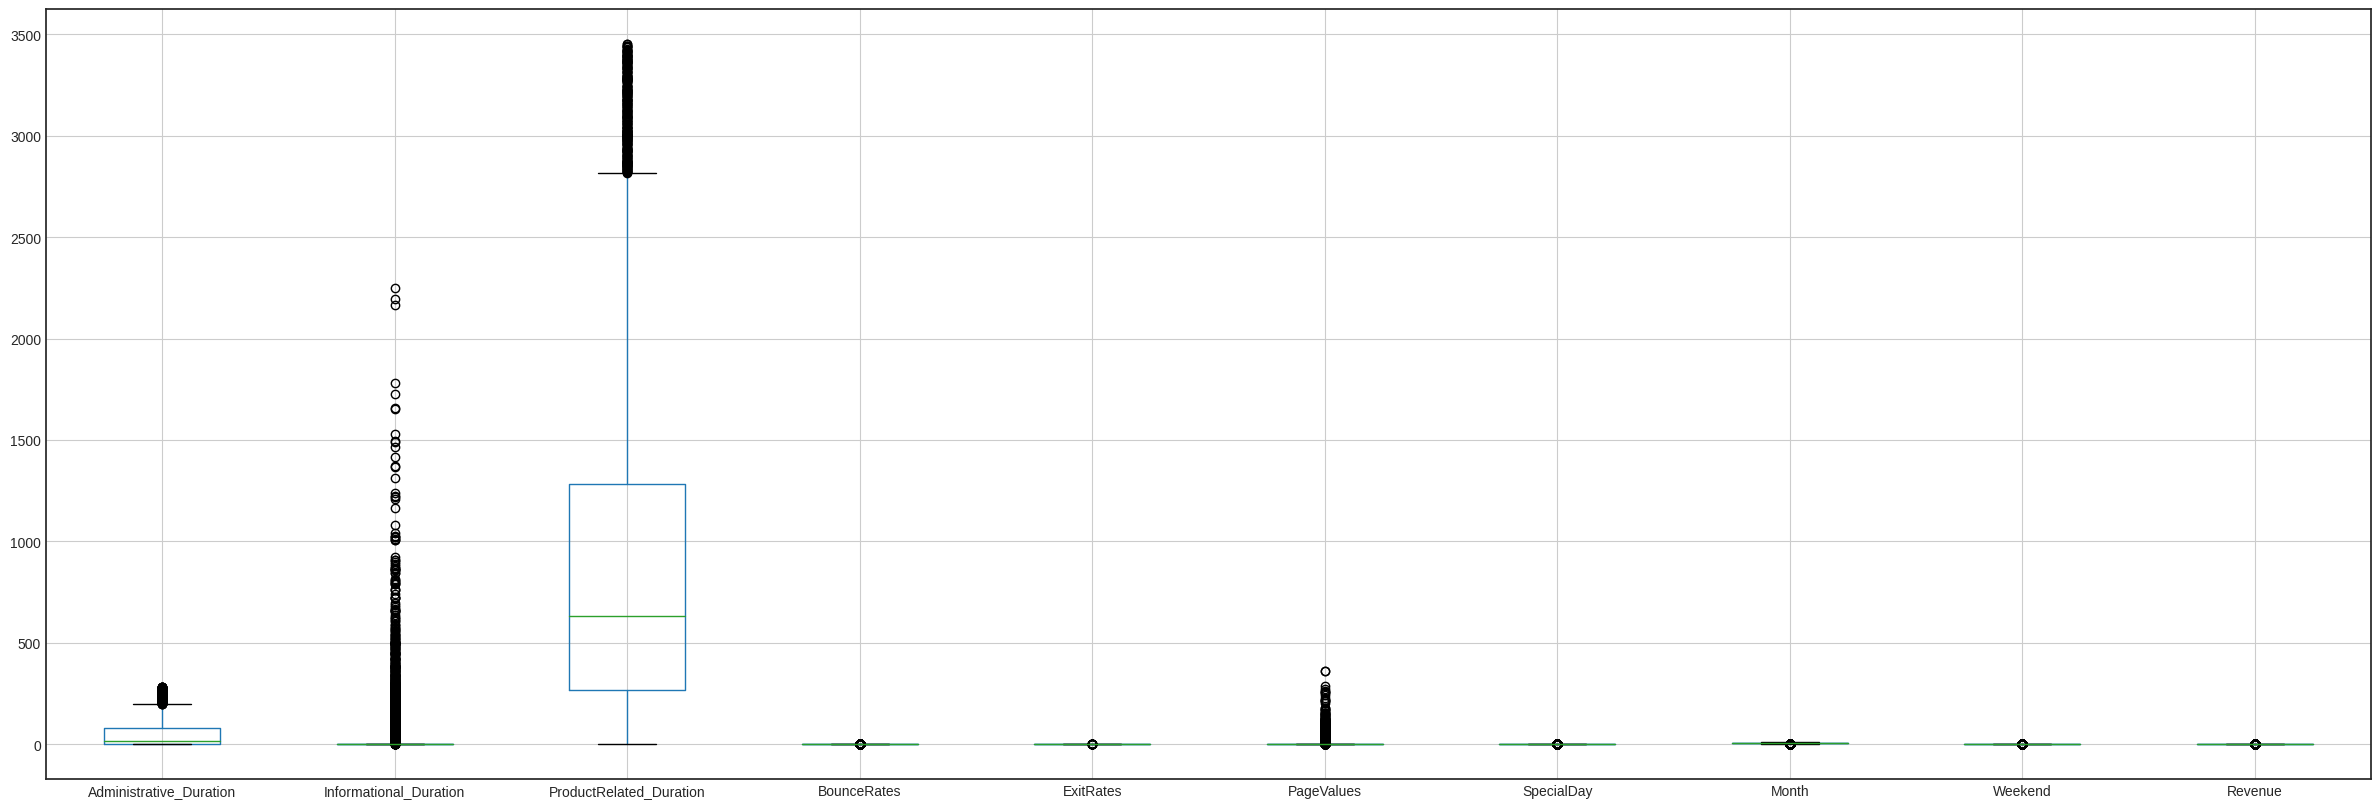

In [235]:
plt.figure(figsize=(30,10))
onlineShopperIntenData.boxplot()

<ipython-input-236-6f7cbe1c9e92>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


Text(0.5, 1.0, 'PageValues')

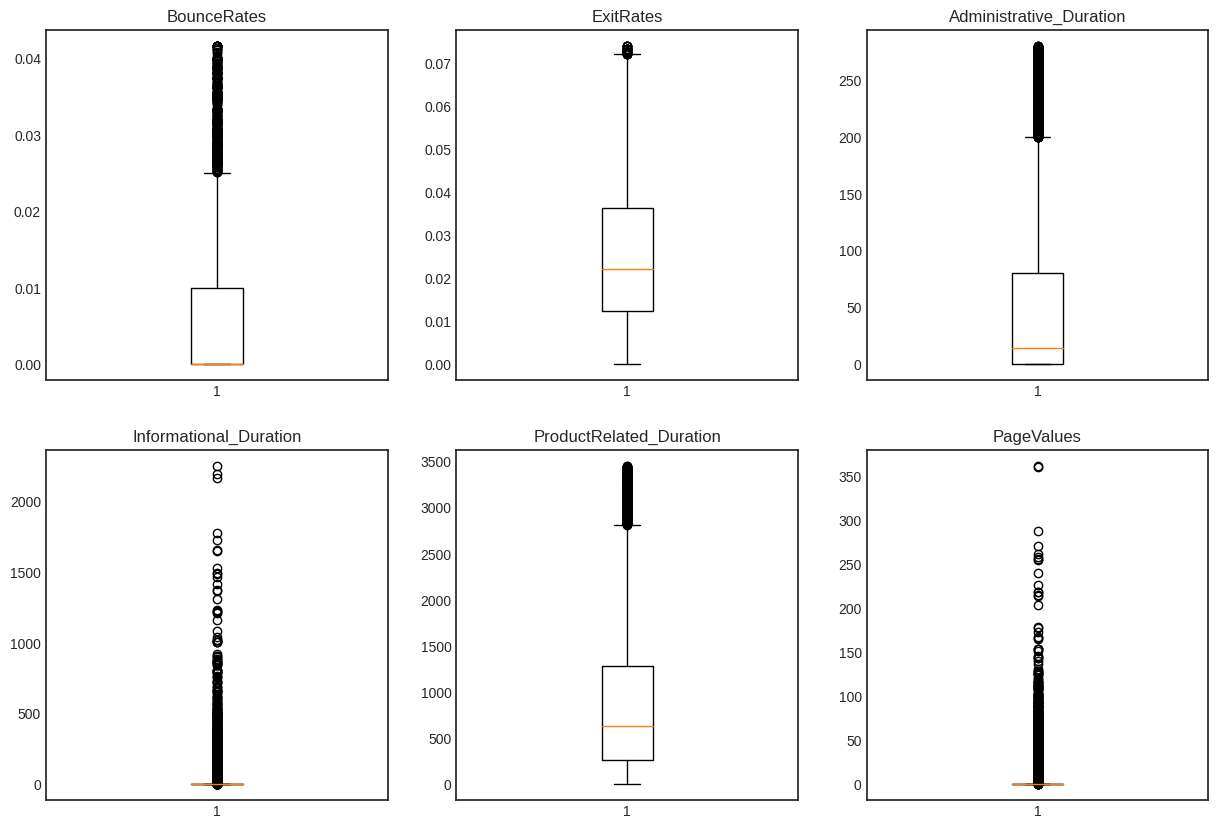

In [236]:
plt.figure(figsize = (15, 10))
plt.style.use('seaborn-white')
ax=plt.subplot(231)
plt.boxplot(onlineShopperIntenData['BounceRates'])
ax.set_title('BounceRates')
ax=plt.subplot(232)
plt.boxplot(onlineShopperIntenData['ExitRates'])
ax.set_title('ExitRates')
ax=plt.subplot(233)
plt.boxplot(onlineShopperIntenData['Administrative_Duration'])
ax.set_title('Administrative_Duration')
ax=plt.subplot(234)
plt.boxplot(onlineShopperIntenData['Informational_Duration'])
ax.set_title('Informational_Duration')
ax=plt.subplot(235)
plt.boxplot(onlineShopperIntenData['ProductRelated_Duration'])
ax.set_title('ProductRelated_Duration')
ax=plt.subplot(236)
plt.boxplot(onlineShopperIntenData['PageValues'])
ax.set_title('PageValues')

Text(0, 0.5, '')

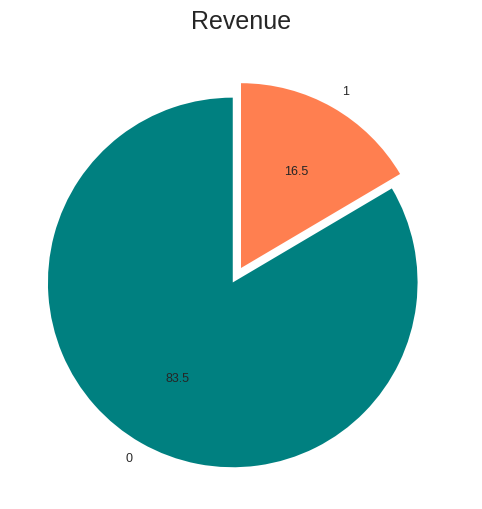

In [237]:
plt.figure(figsize=(9,6))
onlineShopperIntenData['Revenue'].value_counts().plot(kind='pie',autopct='%1.1f', textprops={'fontsize': 9},startangle=90,explode =(0.09,0),colors=['teal','coral'])
plt.title('Revenue', fontsize = 18)
plt.ylabel('')

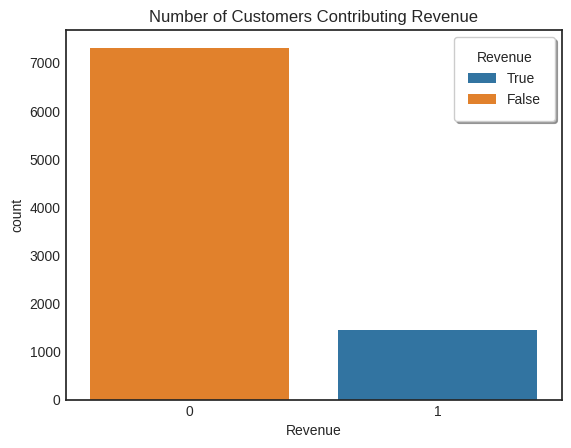

In [238]:
plt.title('Number of Customers Contributing Revenue')
sns.countplot(data=onlineShopperIntenData, x='Revenue', hue='Revenue', hue_order=[1, 0], dodge=False)
plt.legend(title='Revenue', loc='upper right', labels=['True', 'False'], ncol=1, frameon=True, fancybox=True, shadow=True, borderpad=1)
plt.show()



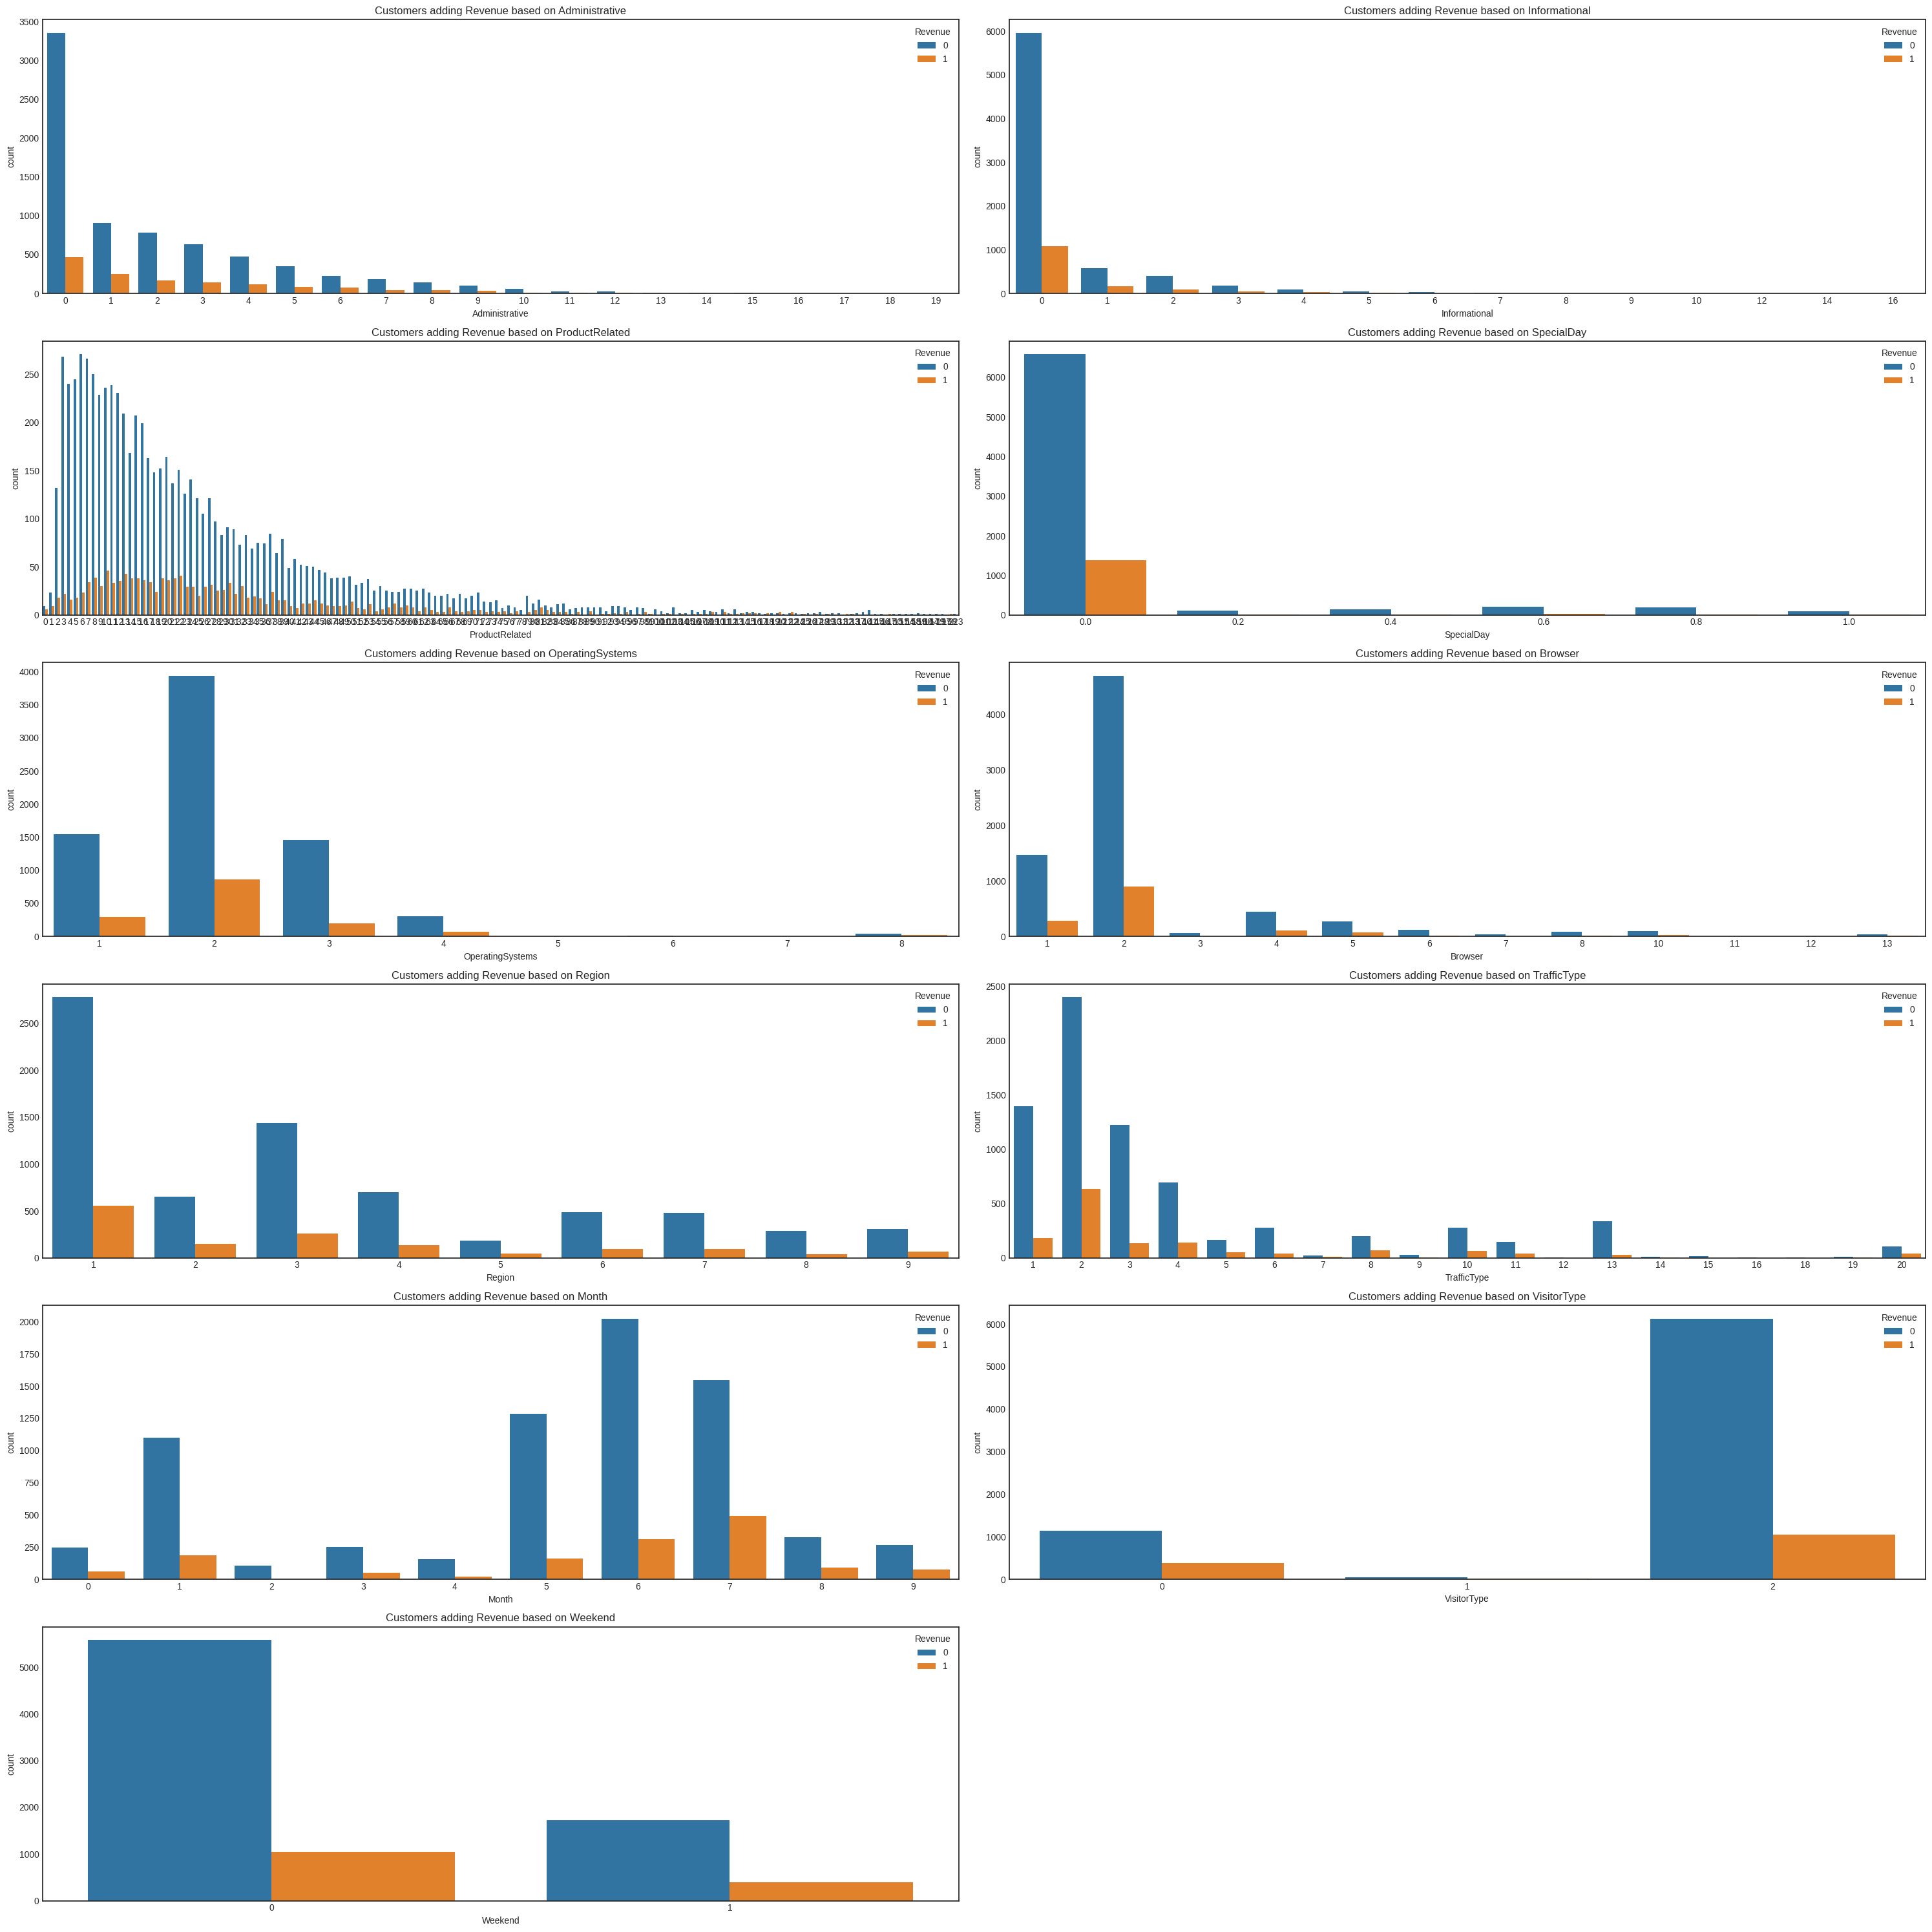

In [239]:
column1l=['Administrative','Informational','ProductRelated','SpecialDay','OperatingSystems','Browser','Region','TrafficType','Month','VisitorType','Weekend']    
plt.figure(figsize=(30,30))
plot_number = 0
for i in column1l:
    plot_number = plot_number + 1
    ax = plt.subplot(6, 2, plot_number,adjustable='datalim')
    sns.countplot(x=onlineShopperIntenData[i],hue=onlineShopperIntenData['Revenue'])
    ax.set_title('Customers adding Revenue based on '+ i,fontdict=None)
    plt.tight_layout()

In [240]:
# columnsOSIData= onlineShopperIntenData.columns
# columnsOSIData=columnsOSIData.drop(['Month','VisitorType','Weekend','Revenue'])
columnsOSIData=['BounceRates','ExitRates','Administrative_Duration','ProductRelated_Duration']
print(columnsOSIData)

for col in columnsOSIData:
  q1 = np.percentile(onlineShopperIntenData[col], 25)
  q3 = np.percentile(onlineShopperIntenData[col], 75)
  iqr = q3 - q1

  # Calculate the lower and upper bounds for outliers
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  print(upper_bound)

  outliersFilter = (onlineShopperIntenData[col] >= lower_bound) & (onlineShopperIntenData[col] <= upper_bound)
  onlineShopperIntenData=onlineShopperIntenData.loc[outliersFilter]
  # num_outliers = outliers.shape[0]
  
  # # Print the results for each feature
  # print(f"Feature: {col}")
  # print(f"Number of outliers: {num_outliers}")
  # print(f"Outlier values: {outliers[col].values}")
  # print("="*50)

['BounceRates', 'ExitRates', 'Administrative_Duration', 'ProductRelated_Duration']
0.025
0.065212224
211.62500000625
2838.4007737499996


<ipython-input-241-a7c242661109>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


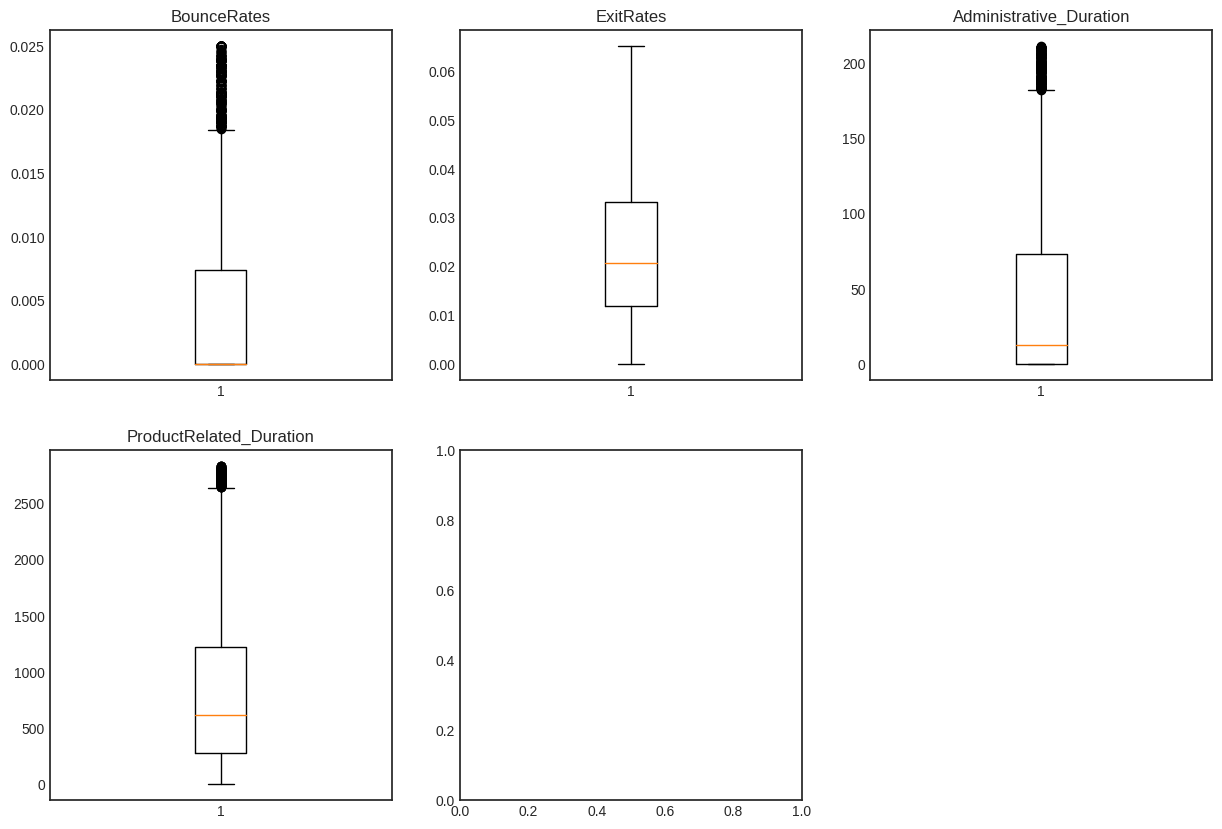

In [241]:
plt.figure(figsize = (15, 10))
plt.style.use('seaborn-white')
ax=plt.subplot(231)
plt.boxplot(onlineShopperIntenData['BounceRates'])
ax.set_title('BounceRates')
ax=plt.subplot(232)
plt.boxplot(onlineShopperIntenData['ExitRates'])
ax.set_title('ExitRates')
ax=plt.subplot(233)
plt.boxplot(onlineShopperIntenData['Administrative_Duration'])
ax.set_title('Administrative_Duration')
ax=plt.subplot(234)
plt.boxplot(onlineShopperIntenData['ProductRelated_Duration'])
ax.set_title('ProductRelated_Duration')
ax=plt.subplot(235)


#### **Feature Engineering and Feature Selection**


In [242]:
encodedFeatures=['Month','VisitorType','Revenue','Weekend']

labEncoder= LabelEncoder()
for col in encodedFeatures:
  onlineShopperIntenData[col]= labEncoder.fit_transform(onlineShopperIntenData[col])



In [243]:
Categorical_variables=['Weekend','Revenue','Administrative','Informational','ProductRelated','SpecialDay',
 'OperatingSystems','Browser','Region','Month','TrafficType','VisitorType']
feature_scale=[feature for feature in onlineShopperIntenData.columns if feature not in Categorical_variables]

print(feature_scale)
scaler = StandardScaler()
# scaler.fit(onlineShopperIntenData[feature_scale])
# scaler = StandardScaler()
scaledONSI = scaler.fit_transform(onlineShopperIntenData[feature_scale])

# scaledDF= pd.DataFrame(scaledONSI,columns=feature_scale)
# newDF= pd.concat([onlineShopperIntenData[Categorical_variables],scaledDF],axis=1)
# print(newDF.head(10))


scaled_data = pd.concat([onlineShopperIntenData[Categorical_variables].reset_index(drop=True),
                    pd.DataFrame(scaledONSI, columns=feature_scale)],
                    axis=1)
scaled_data.head()

['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues']


,Weekend,Revenue,Administrative,Informational,ProductRelated,SpecialDay,OperatingSystems,Browser,Region,Month,TrafficType,VisitorType,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues
0,1,0,0,0,10,0.0,3,3,1,2,4,2,-0.764334,-0.227184,-0.288612,2.320730,1.894443,-0.337392
1,0,0,0,0,19,0.0,2,2,1,2,3,2,-0.764334,-0.227184,-0.972833,1.695934,0.102086,-0.337392
2,0,0,0,0,3,0.4,2,4,1,2,2,2,-0.764334,-0.227184,-0.128864,-0.647053,-0.062728,-0.337392
3,0,0,0,0,16,0.4,1,1,4,2,3,2,-0.764334,-0.227184,-0.606303,2.135244,0.191704,-0.337392
4,0,0,0,0,7,0.0,1,1,1,2,3,2,-0.764334,-0.227184,-0.790267,-0.647053,0.384625,-0.337392


In [244]:
scaled_data.dtypes

Weekend                      int64
Revenue                      int64
Administrative              object
Informational               object
ProductRelated              object
SpecialDay                 float64
OperatingSystems            object
Browser                     object
Region                      object
Month                        int64
TrafficType                 object
VisitorType                  int64
Administrative_Duration    float64
Informational_Duration     float64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
dtype: object

In [245]:
X=scaled_data.drop(['Revenue'],axis=1)
y=scaled_data.Revenue

model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

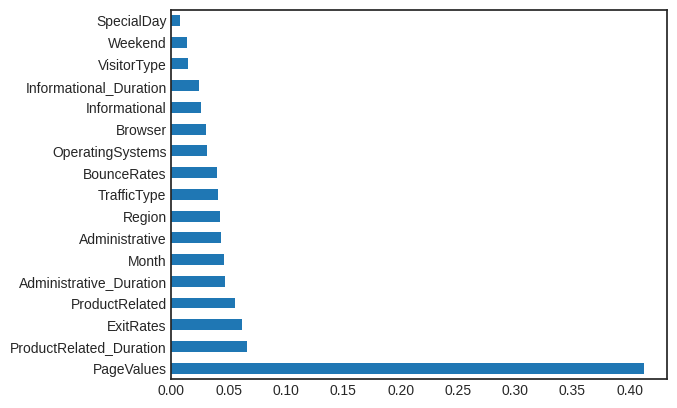

In [246]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(17).plot(kind='barh')
plt.show()

In [273]:
X=X.drop(['SpecialDay','VisitorType','Weekend'],axis=1)

In [270]:
# Calculate Pearson correlation coefficient
correlations = []
for feature in X.columns:
    corr, _ = pearsonr(X[feature], y)
    correlations.append(corr)
    print('Pearson correlation coefficient between %s and Revenue: %.3f' % (feature, corr))




Pearson correlation coefficient between Weekend and Revenue: 0.038
Pearson correlation coefficient between Administrative and Revenue: 0.045
Pearson correlation coefficient between Informational and Revenue: 0.043
Pearson correlation coefficient between ProductRelated and Revenue: 0.063
Pearson correlation coefficient between SpecialDay and Revenue: -0.058
Pearson correlation coefficient between OperatingSystems and Revenue: -0.006
Pearson correlation coefficient between Browser and Revenue: 0.024
Pearson correlation coefficient between Region and Revenue: -0.002
Pearson correlation coefficient between Month and Revenue: 0.062
Pearson correlation coefficient between TrafficType and Revenue: 0.016
Pearson correlation coefficient between VisitorType and Revenue: -0.111
Pearson correlation coefficient between Administrative_Duration and Revenue: 0.055
Pearson correlation coefficient between Informational_Duration and Revenue: 0.026
Pearson correlation coefficient between ProductRelated_Du